k-NEAREST NEIGHBORS problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
FEATURE_NAMES = './HAR_Dataset/features.txt'
TRAIN_DATA = './HAR_Dataset/train/X_train.txt'
TRAIN_LABELS = './HAR_Dataset/train/y_train.txt'

In [3]:
# read feature names
feats = pd.read_table(FEATURE_NAMES, sep='\n', header=None)

# read in training data
har_train = pd.read_table(TRAIN_DATA, sep='\s+', header=None)

# read in training labels
har_train_labels = pd.read_table(TRAIN_LABELS, sep='\n', header=None, names=["label"], squeeze = True)

In [4]:
har_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
har_train.columns = feats.iloc[:,0]
har_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


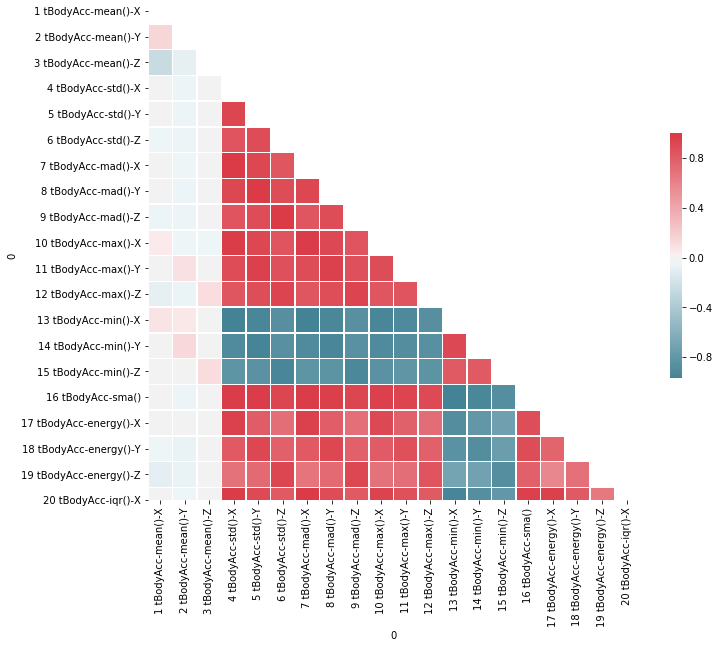

In [6]:
#provided
first_twenty = har_train.iloc[:, :20] 
# compute correlation matrix
corr = first_twenty.corr()  
# make mask
mask = np.zeros_like(corr, dtype=np.bool)  
# mask the upper triangle
mask[np.triu_indices_from(mask)] = True  

# create a figure and a subplot
fig, ax = plt.subplots(figsize=(11, 9))  
# costumizing the color map
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    linewidth=0.5,
    cbar_kws={'shrink': 0.5}
);

In [7]:
#distances of points
def all_distances(test_point, data_set):
    dist=[]
    for i in range(data_set.shape[0]):   
   # return dist
        t=har_train.iloc[i,:]
        p=test_point
        d=np.linalg.norm(t-p)
        dist.append(d)
    dist_s=dist.sort()
    print(dist_s)
    return dist

In [8]:
def labels_of_smallest(numeric, labels, n):
    numeric=pd.DataFrame(numeric)
    labels=pd.DataFrame(labels)
    asg=pd.concat((labels, numeric), axis=1,keys=['labels', 'numeric'])
    asg_s=asg.sort_values(('numeric',0),axis=0, ascending=True)
    asg_n=asg_s.iloc[0:n,]
    asg_f=asg_n['labels']
    return asg_f.values.tolist()

In [9]:
#most frequent value
from collections import Counter
def label_voting(labels):
    lab_c=Counter(labels)
    lab_t=Counter(lab_c).most_common(1)
    return lab_t[0][0]


In [10]:
def custom_KNN( point, X_train, y_train, n):
    def label_voting(labels):
        lab_c=Counter(labels)
        lab_t=Counter(lab_c).most_common(1)
        return lab_t[0][0]
    diff=point-X_train
    dists=np.apply_along_axis(np.linalg.norm,1,diff)
    df=pd.DataFrame(dists)
    df.index=X_train.index
    df=pd.concat([df,y_train],axis=1)
    df.columns=['dist','labels']    
    votes=df.sort_values("dist").head(n)['labels']
    return label_voting(votes)

In [11]:
#simple example
point = pd.Series([1,2])
X_train = pd.DataFrame([[1,2],[3,4],[5,6]])
y_train = pd.Series(["a","a","b"])
n = 2
print(custom_KNN(point, X_train, y_train, n))

a


In [12]:
#full data set, provided
#%%time
from sklearn.model_selection import train_test_split
y = har_train_labels 
X = har_train

# Create New tts

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

print("Total 'test' observations:", len(X_test))
print("Classifying every point in X_test would take too long - classify the first 200")
custom_preds = []
for i, idx in enumerate(X_test.index[:200]):
   if i % 100 == 0: print(i)
   pred = custom_KNN(X_test.loc[idx,:], X_train, y_train, 5)
   custom_preds.append(pred)

Total 'test' observations: 2206
Classifying every point in X_test would take too long - classify the first 200
0
100


In [13]:
#difference customer code vs sklearn, provided
#%%time
# Import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Instantiate classifier
# NB: Default distance is Euclidean
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit model with training data
knn.fit(X_train, y_train)

# Create predictions for first 200 test observations
# # (As was done above with customKNN)
skpreds = knn.predict(X_test[:200])

print("sklearn prediction performance")
print(classification_report(y_test[:200], skpreds))


### The below lines of code will compare the performance of your home-built classification with
### The sklearn predictions -- if all the cells above were run sucessfully, you should see identical scores

print("\nHome-Built prediction performance")
print(classification_report(y_test[:200], custom_preds))


### The below lines of code will explicitly compare predictions:
### "differences" should == 0!

### NB: Commenting/uncommenting multiple lines in Jupyter can be accomplished with:
### <ctrl-/> on windows and <cmd-/> on mac
differences = 0
for cust, sk in zip(custom_preds, skpreds):
    if cust != sk:
        differences +=1
print("Total Differences:", differences)

sklearn prediction performance
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       0.97      1.00      0.99        33
           3       1.00      0.95      0.98        22
           4       0.82      0.92      0.87        25
           5       0.94      0.86      0.90        36
           6       1.00      1.00      1.00        40

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.96      0.96       200


Home-Built prediction performance
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       0.97      1.00      0.99        33
           3       1.00      0.95      0.98        22
           4       0.82      0.92      0.87        25
           5       0.94      0.86      0.90        36
           6       1.00      1.00      1.00        40

    accurac